In [25]:
# Activate intractive functionality of matplotlib
%matplotlib ipympl
import numpy as np
import pandas as pd
import h5py
from tqdm import tqdm
import matplotlib.pyplot as plt
# Activate auto reload 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
    
from pyccapt.calibration.data_tools import data_loadcrop
from pyccapt.calibration.data_tools import raw_data_surface_concept
from pyccapt.calibration.calibration.mc_plot import AptHistPlotter
from pyccapt.calibration.data_tools.data_loadcrop import plot_crop_fdm
from pyccapt.calibration.mc import mc_tools
from pyccapt.calibration.reconstructions import sdm, rdf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
filename = 'D:/pyccapt/tests/data/data_1642_Aug-30-2023_16-05_Al_test4.h5'
# filename = 'C:/Users/mehrp/PycharmProjects/pyccapt/tests/data/data_1642_Aug-30-2023_16-05_Al_test4.h5'
df_dld = data_loadcrop.fetch_dataset_from_dld_grp(filename, extract_mode='dld')

{'apt': ['high_voltage', 'main_chamber_vacuum', 'num_events', 'pulse', 'temperature', 'time_counter'], 'dld': ['high_voltage', 'pulse', 'start_counter', 't', 'x', 'y'], 'tdc': ['channel', 'high_voltage', 'pulse', 'start_counter', 'time_data'], 'time': ['time_h', 'time_m', 'time_s']}


In [3]:
df_dld

,high_voltage (V),pulse,start_counter,t (ns),x_det (cm),y_det (cm)
0,600.000000,328.0,8202,2537.802979,1.080816,0.006531
1,615.000000,328.0,14741,3686.929443,1.443265,-1.812245
2,624.979980,328.0,2657,3110.466553,-0.688980,-2.249796
3,624.979980,328.0,4568,1171.380737,0.192653,-0.914286
4,634.919983,328.0,4498,2703.307129,0.058776,1.479184
...,...,...,...,...,...,...
12312991,8000.000000,1600.0,11089,3722.090332,2.282449,2.798367
12312992,8000.000000,1600.0,13935,3065.292725,3.725714,-0.675918
12312993,8000.000000,1600.0,2722,2561.627686,3.229388,1.573878
12312994,8000.000000,1600.0,3387,3579.656494,0.414694,2.693877


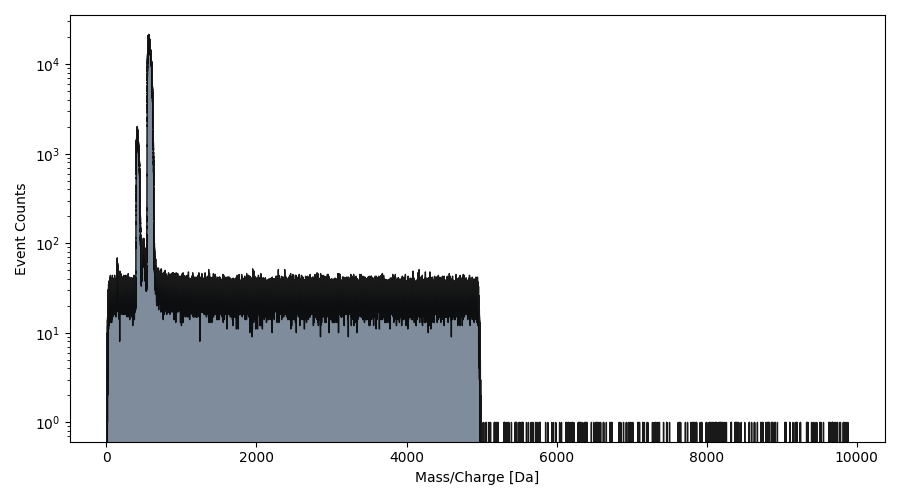

In [155]:
mc_plot = AptHistPlotter(df_dld['t (ns)'].to_numpy())
y_hist, x_hist = mc_plot.plot_histogram()

9881.7470703125
4.0
-4.0
3.996734619140625
-4.0


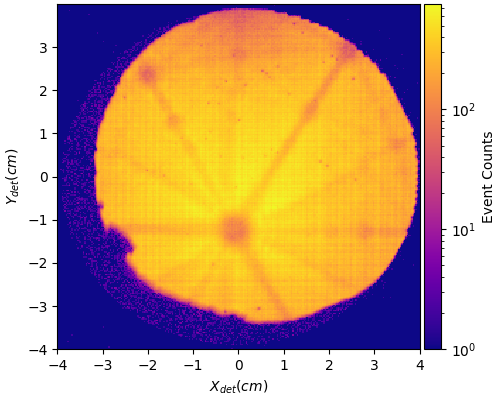

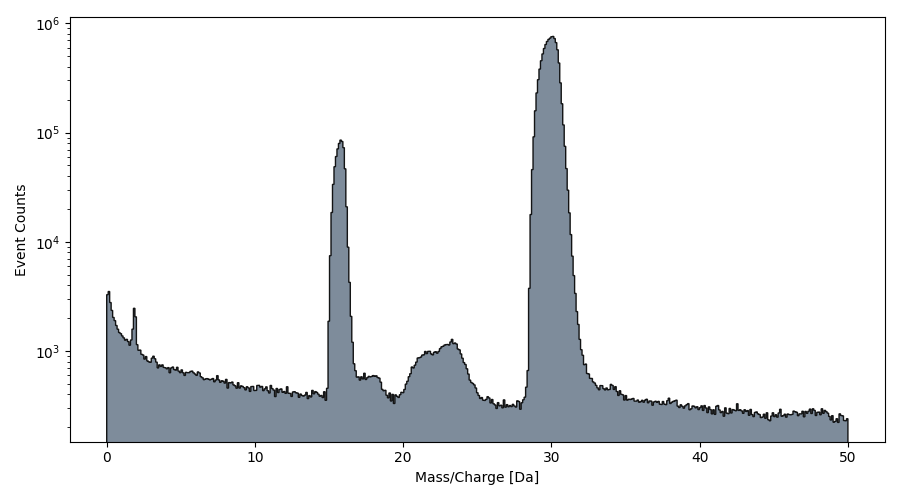

In [4]:
print(np.max(df_dld['t (ns)'].to_numpy()))
print(np.max(df_dld['x_det (cm)'].to_numpy()))
print(np.min(df_dld['x_det (cm)'].to_numpy()))
print(np.max(df_dld['y_det (cm)'].to_numpy()))
print(np.min(df_dld['y_det (cm)'].to_numpy()))

plot_crop_fdm(df_dld)
# mc = mc_tools.tof2mc(t=np.array(tof_total), t0=0, V=np.array(high_voltage_total), xDet=np.array(det_x_total), yDet=np.array(det_x_total), flightPathLength=110, V_pulse=np.array(pulse_total), mode='voltage')
mc = mc_tools.tof2mc(t=df_dld['t (ns)'].to_numpy(), t0=0, V=df_dld['high_voltage (V)'].to_numpy(), xDet=df_dld['x_det (cm)'].to_numpy(), yDet=df_dld['y_det (cm)'].to_numpy(), flightPathLength=110, V_pulse=np.zeros(len(df_dld)), mode='voltage')
mc_plot = AptHistPlotter(mc[mc<50])
y_hist, x_hist = mc_plot.plot_histogram()

In [5]:
df_tdc = data_loadcrop.fetch_dataset_from_dld_grp(filename, extract_mode='tdc_sc')

{'apt': ['high_voltage', 'main_chamber_vacuum', 'num_events', 'pulse', 'temperature', 'time_counter'], 'dld': ['high_voltage', 'pulse', 'start_counter', 't', 'x', 'y'], 'tdc': ['channel', 'high_voltage', 'pulse', 'start_counter', 'time_data'], 'time': ['time_h', 'time_m', 'time_s']}


In [6]:
df_tdc

,channel,start_counter,high_voltage (V),pulse,time_data
0,1,8202,600.0,328.0,92186
1,3,8202,600.0,328.0,92507
2,2,8202,600.0,328.0,92510
3,0,8202,600.0,328.0,92847
4,2,13183,600.0,328.0,85018
...,...,...,...,...,...
59971104,0,9312,8000.0,1600.0,124720
59971105,3,9312,8000.0,1600.0,125864
59971106,2,9312,8000.0,1600.0,125796
59971107,1,14307,8000.0,1600.0,66948


In [7]:
channel = df_tdc['channel'].to_numpy()
start_counter = df_tdc['start_counter'].to_numpy()
time_data = df_tdc['time_data'].to_numpy()
high_voltage = df_tdc['high_voltage (V)'].to_numpy()
pulse = df_tdc['pulse'].to_numpy()

In [8]:
result_4, result_4_invalid, result_3_invalid, result_2_invalid, result_1_invalid, result_other_odd, result_other_even = raw_data_surface_concept.find_consecutive_sequences_seperatly(start_counter, channel, time_data, high_voltage, pulse)

Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59971109/59971109 [04:02<00:00, 247773.13it/s]

Length of 4 channel: 11870461.0, 79.17453052268884 %
Length of 4 channel (invalid): 0.0, 0.0 %
Length of 3 channel: 2177518.0, 10.89283508163906 %
Length of 2 channel: 1655911.0, 5.522362442888959 %
Length of 1 channel: 1018779, 1.6987829923238538 %
Length of groups of four channel (multihit): 872264, 1.4544736866546857 %
Length of not group of four channel (multihit): 753846, 1.2570152738045914 %
Total length: 59971109


In [9]:
print(len(result_4))
print(len(result_other_even))
print(len(result_other_odd))

even_ions = 0
odd_ions = 0
ions_4 = 0
for i in range(len(result_4)):         
    ions_4 += result_4[i]['valid_event'].count(True)
for i in range(len(result_other_even)):         
    even_ions += result_other_even[i]['valid_event'].count(True)
for i in range(len(result_other_odd)):         
    odd_ions += result_other_odd[i]['valid_event'].count(True)

print(ions_4)
print(even_ions)
print(odd_ions)
print('maximum possible number of ions:', ions_4 + even_ions + odd_ions)

11870461
106639
117835
11870461
217019
119776
maximum possible number of ions: 12207256


In [10]:
max_length_even = 0
max_length_odd = 0

for i in range(len(result_other_even)):         
    if len(result_other_even[i]['channels']) > max_length_even:
        max_length_even = len(result_other_even[i]['channels'])
for i in range(len(result_other_odd)):         
    if len(result_other_odd[i]['channels']) > max_length_odd:
        max_length_odd = len(result_other_odd[i]['channels'])
        
print('The maximum number of channels for even start counter:', max_length_even)
print('The maximum number of channels for odd start counter:', max_length_odd)

The maximum number of channels for even start counter: 212
The maximum number of channels for odd start counter: 425


In [11]:
# surface concept tdc specific binning and factors
TOFFACTOR = 27.432 / (1000 * 4)  # 27.432 ps/bin, tof in ns, data is TDC time sum
TOFFACTOR2 = 27.432 / (1000 * 2) 
DETBINS = 4900
BINNINGFAC = 2
XYFACTOR = 80 / DETBINS * BINNINGFAC  # XXX mm/bin
XYBINSHIFT = DETBINS / BINNINGFAC / 2  # to center detector

In [12]:
index = 1
aa = df_dld.iloc[index]
print(aa)
print(result_4[index])
time_data_tmp = np.array(result_4[index]['time_data'], dtype=np.int64)

high_voltage (V)      615.000000
pulse                 328.000000
start_counter       14741.000000
t (ns)               3686.929443
x_det (cm)              1.443265
y_det (cm)             -1.812245
Name: 1, dtype: float64
{'channels': [0, 1, 2, 3], 'time_data': [134846, 133962, 133846, 134956], 'start_counter': [14741, 14741, 14741, 14741], 'valid_event': [True], 'high_voltage': 619.989990234375, 'pulse': 328.0, 'indices': (13, 16), 'length': 4}


In [13]:
xx_dif = time_data_tmp[1] - time_data_tmp[0]
yy_dif = time_data_tmp[3] - time_data_tmp[2]
print(xx_dif, yy_dif)
xx_dif = -0.5*xx_dif + 1225
yy_dif = -0.5*yy_dif + 1225
print(xx_dif, yy_dif)
time = time_data_tmp[0] + time_data_tmp[1] + time_data_tmp[2] + time_data_tmp[3]
time2 = time_data_tmp[0] + time_data_tmp[1]
time3 = time_data_tmp[2] + time_data_tmp[3]
det_x = (((xx_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
det_y = (((yy_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
tof = time * TOFFACTOR
tof2 = time2 * TOFFACTOR2
tof3 = time3 * TOFFACTOR2
print('det_x:', det_x, 'det_y:', det_y, 'tof:', tof, 'tof(0-1):', tof2, 'tof(2-3):', tof3)

-884 1110
1667.0 670.0
det_x: 1.4432653061224492 det_y: -1.8122448979591839 tof: 3686.9293799999996 tof(0-1): 3686.970528 tof(2-3): 3686.888232


In [14]:
det_x_4 = []
det_y_4 = []
tof_4 = []
start_counter_4 = []
high_voltage_4 = []
pulse_4 = []
print('length of result_4:', len(result_4))

for ion in tqdm(result_4, desc="Processing", unit="iteration"):
    if ion['valid_event'][0] == True:
        time_data_tmp = np.array(ion['time_data'], dtype=np.int64)
        xx_dif = time_data_tmp[1] - time_data_tmp[0]
        yy_dif = time_data_tmp[3] - time_data_tmp[2]
        time = time_data_tmp[0] + time_data_tmp[1] + time_data_tmp[2] + time_data_tmp[3]
        xx_dif = -0.5*xx_dif + 1225
        yy_dif = -0.5*yy_dif + 1225
        xx_dif = (((xx_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
        yy_dif = (((yy_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
        if abs(xx_dif) <= 4 and abs(yy_dif) <= 4:
            det_x_4.append(xx_dif)
            det_y_4.append(yy_dif)
            tof_4.append(time * TOFFACTOR)
            start_counter_4.append(np.array(ion['start_counter'], dtype=np.int64)[0])
            high_voltage_4.append(ion['high_voltage'])
            pulse_4.append(ion['pulse'])


print(len(det_x_4))
print('loss:', (len(det_x_4) / len(result_4))*100)
    

length of result_4: 11870461


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11870461/11870461 [01:52<00:00, 105842.08iteration/s]

11861424
loss: 99.92386984802022


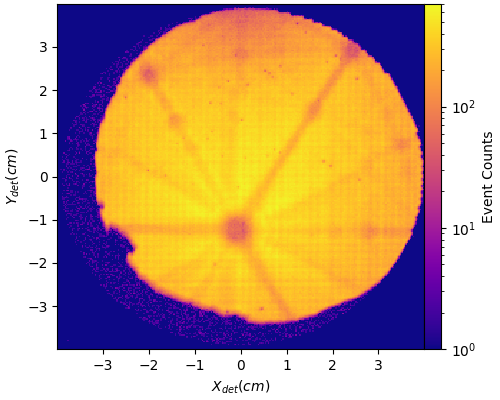

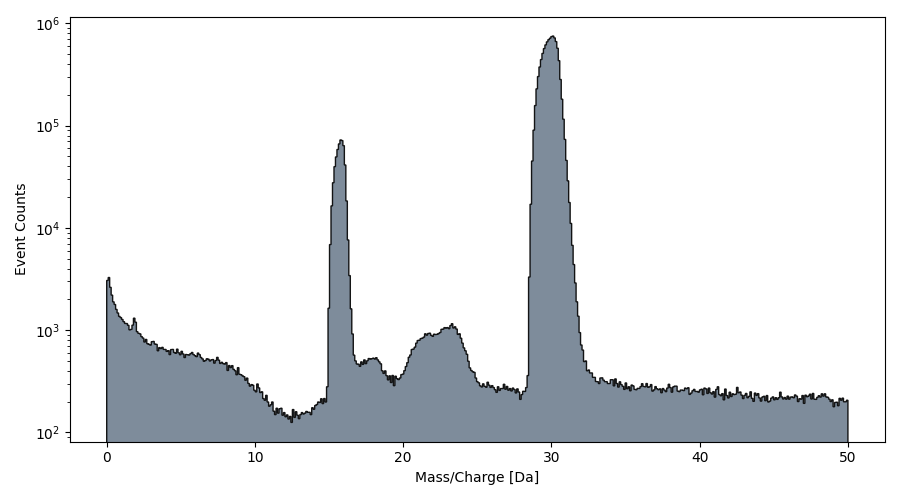

In [15]:
fdm = {'x_det (cm)': det_x_4, 'y_det (cm)': det_y_4}
fdm = pd.DataFrame(fdm)

plot_crop_fdm(fdm)
mc = mc_tools.tof2mc(t=np.array(tof_4), t0=0, V=np.array(high_voltage_4), xDet=np.array(det_x_4), yDet=np.array(det_y_4), flightPathLength=110, V_pulse=np.zeros(len(tof_4)), mode='voltage')
mc_plot = AptHistPlotter(mc[mc<50])
y_hist, x_hist = mc_plot.plot_histogram()

In [16]:
det_x_even = []
det_y_even = []
tof_even = []
start_counter_even = []
high_voltage_even = []
pulse_even = []
ion_count = 0
even_count = 0
true_event = 0
print('length of result_even:', len(result_other_even))
length_result_even_valid = len([x for x in result_other_even if x['length'] == 4 and x['valid_event'] == [True]])
print()
for ion in tqdm(result_other_even, desc="Processing", unit="iteration"):
    time_data_tmp = np.array(ion['time_data'], dtype=np.int64)
    for index, event in enumerate(ion['valid_event']):
        even_count += 1 
        if event == True:
            true_event += 1
            xx_dif = time_data_tmp[index*4 + 1] - time_data_tmp[index*4 + 0]
            yy_dif = time_data_tmp[index*4 + 3] - time_data_tmp[index*4 + 2]
            time = time_data_tmp[index*4 + 0] + time_data_tmp[index*4 + 1] + time_data_tmp[index*4 + 2] + time_data_tmp[index*4 + 3]
            xx_dif = -0.5*xx_dif + 1225
            yy_dif = -0.5*yy_dif + 1225
            xx_dif = (((xx_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
            yy_dif = (((yy_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
            if abs(xx_dif) <= 4 and abs(yy_dif) <= 4:
                det_x_even.append(xx_dif)
                det_y_even.append(yy_dif)
                tof_even.append(time * TOFFACTOR)
                start_counter_even.append(np.array(ion['start_counter'], dtype=np.int64)[0])
                high_voltage_even.append(ion['high_voltage'])
                pulse_even.append(ion['pulse'])
                ion_count += 1
print(len(det_x_even))
print('loss True event-total event:', (true_event / even_count)*100)
print('loss True event-total ions:', (ion_count / true_event)*100)

length of result_even: 106639



Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106639/106639 [00:02<00:00, 45764.69iteration/s]

215902
loss True event-total event: 99.46148840023099
loss True event-total ions: 99.4852985222492


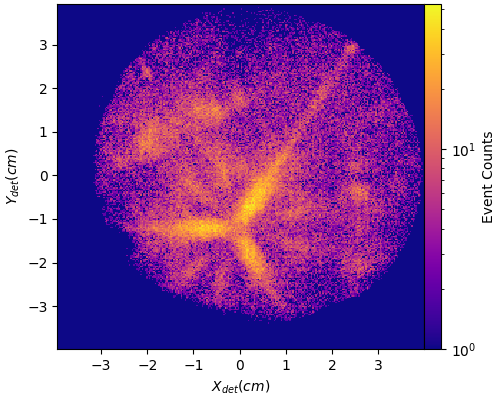

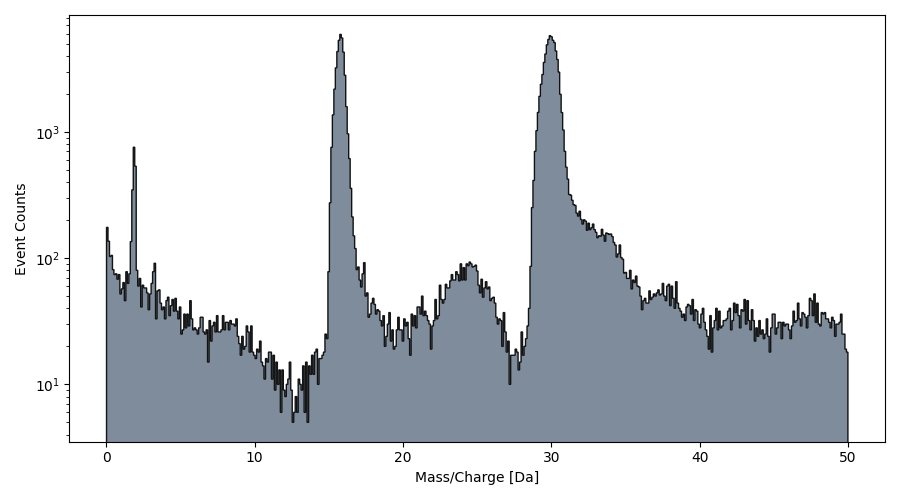

In [17]:
fdm = {'x_det (cm)': det_x_even, 'y_det (cm)': det_y_even}
fdm = pd.DataFrame(fdm)

plot_crop_fdm(fdm)
mc = mc_tools.tof2mc(t=np.array(tof_even), t0=0, V=np.array(high_voltage_even), xDet=np.array(det_x_even), yDet=np.array(det_y_even), flightPathLength=110, V_pulse=np.zeros(len(tof_even)), mode='voltage')
mc_plot = AptHistPlotter(mc[mc<50])
y_hist, x_hist = mc_plot.plot_histogram()

In [18]:
det_x_odd = []
det_y_odd = []
tof_odd = []
start_counter_odd = []
high_voltage_odd = []
pulse_odd = []
ion_count = 0
even_count = 0
true_event = 0
print('length of result_odd:', len(result_other_odd))

for ion in tqdm(result_other_odd, desc="Processing", unit="iteration"):
    time_data_tmp = np.array(ion['time_data'], dtype=np.int64)
    for index, event in enumerate(ion['valid_event']):
        even_count += 1 
        if event == True:
            true_event += 1
            xx_dif = time_data_tmp[index*4 + 1] - time_data_tmp[index*4 + 0]
            yy_dif = time_data_tmp[index*4 + 3] - time_data_tmp[index*4 + 2]
            time = time_data_tmp[index*4 + 0] + time_data_tmp[index*4 + 1] + time_data_tmp[index*4 + 2] + time_data_tmp[index*4 + 3]
            xx_dif = -0.5*xx_dif + 1225
            yy_dif = -0.5*yy_dif + 1225
            xx_dif = (((xx_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
            yy_dif = (((yy_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
            if abs(xx_dif) <= 4 and abs(yy_dif) <= 4:
                det_x_odd.append(xx_dif)
                det_y_odd.append(yy_dif)
                tof_odd.append(time * TOFFACTOR)
                start_counter_odd.append(np.array(ion['start_counter'], dtype=np.int64)[0])
                high_voltage_odd.append(ion['high_voltage'])
                pulse_odd.append(ion['pulse'])
                ion_count += 1

print(len(det_x_odd))
print('loss True event-total event:', (true_event / even_count)*100)
print('loss True event-total ions:', (ion_count / true_event)*100)

length of result_odd: 117835


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117835/117835 [00:01<00:00, 86323.38iteration/s]

86268
loss True event-total event: 49.7505742399887
loss True event-total ions: 72.0244456318461


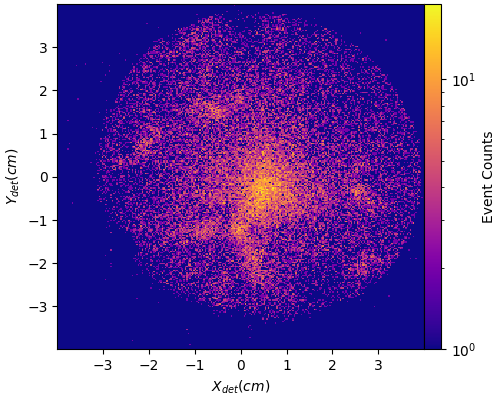

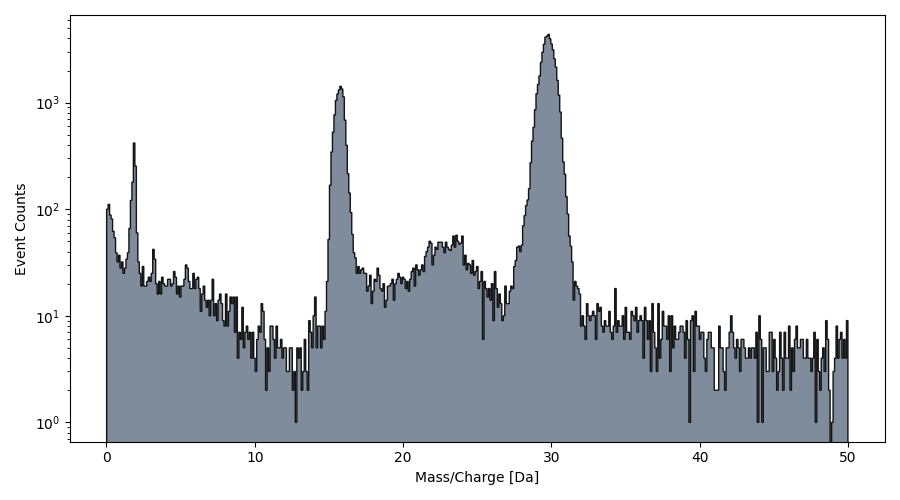

In [19]:
fdm = {'x_det (cm)': det_x_odd, 'y_det (cm)': det_y_odd}
fdm = pd.DataFrame(fdm)

plot_crop_fdm(fdm)
mc = mc_tools.tof2mc(t=np.array(tof_odd), t0=0, V=np.array(high_voltage_odd), xDet=np.array(det_x_odd), yDet=np.array(det_y_odd), flightPathLength=110, V_pulse=np.zeros(len(tof_odd)), mode='voltage')
mc_plot = AptHistPlotter(mc[mc<50])
y_hist, x_hist = mc_plot.plot_histogram()

In [20]:
count = 0
for x in result_4:
    for evn in x['valid_event']:
        if evn == True:
            count += 1
for x in result_other_even:
    for evn in x['valid_event']:
        if evn == True:
            count += 1
for x in result_other_odd:
    for evn in x['valid_event']:
        if evn == True:
            count += 1
print(count)

12207256


12163594


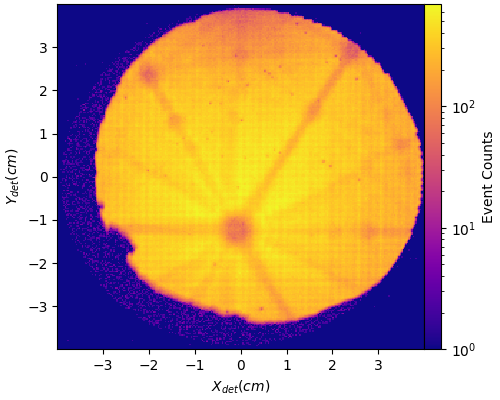

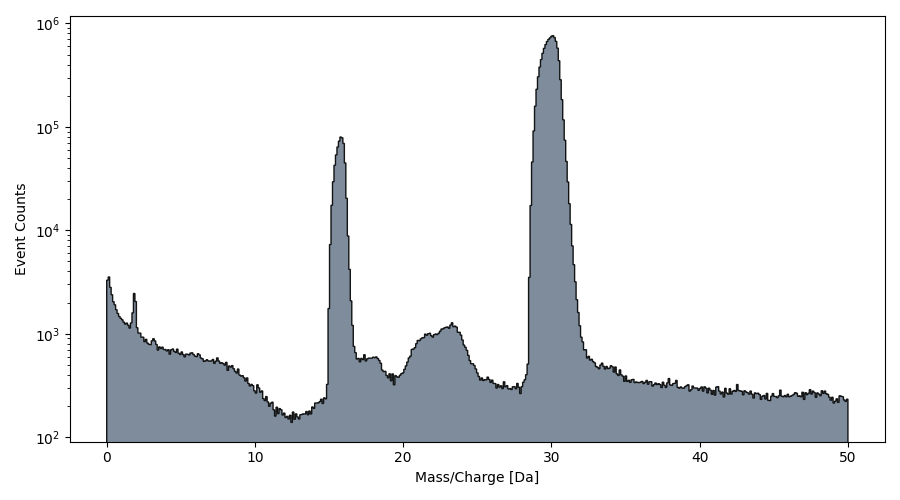

In [21]:
det_x_total_s = det_x_4 + det_x_even + det_x_odd
det_y_total_s = det_y_4 + det_y_even + det_y_odd
tof_total_s = tof_4 + tof_even + tof_odd
start_counter_total_s = start_counter_4 + start_counter_even + start_counter_odd
high_voltage_total_s = high_voltage_4 + high_voltage_even + high_voltage_odd
pulse_total_s = pulse_4 + pulse_even + pulse_odd

print(len(det_x_total_s))


fdm = {'x_det (cm)': det_x_total_s, 'y_det (cm)': det_y_total_s}
fdm = pd.DataFrame(fdm)
plot_crop_fdm(fdm)
mc = mc_tools.tof2mc(t=np.array(tof_total_s), t0=0, V=np.array(high_voltage_total_s), xDet=np.array(det_x_total_s), yDet=np.array(det_y_total_s), flightPathLength=110, V_pulse=np.zeros(len(det_x_total_s)), mode='voltage')
mc_plot = AptHistPlotter(mc[mc<50])
y_hist, x_hist = mc_plot.plot_histogram()

In [22]:
result_other_even[2]

{'channels': [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3],
 'time_data': [6859,
  7183,
  7990,
  6051,
  30651,
  30914,
  31749,
  29820,
  38572,
  38672,
  39344,
  37901],
 'start_counter': [1965,
  1965,
  1965,
  1965,
  1965,
  1965,
  1965,
  1965,
  1965,
  1965,
  1965,
  1965],
 'valid_event': [True, True, True],
 'high_voltage': 2799.02001953125,
 'pulse': 559.8040161132812,
 'indices': (4097, 4108),
 'length': 12}

In [23]:
result_other_odd[16]

{'channels': [0, 1, 2, 3, 0, 3],
 'time_data': [28140, 29673, 29510, 28288, 28645, 28788],
 'start_counter': [2353, 2353, 2353, 2353, 2353, 2353],
 'valid_event': [True, False],
 'high_voltage': 3151.43994140625,
 'pulse': 630.2880249023438,
 'indices': (5714, 5719),
 'length': 6}

In [24]:
result_total = raw_data_surface_concept.find_consecutive_sequences(start_counter, channel, time_data, high_voltage, pulse, print_stats=True)

Processing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59971109/59971109 [04:07<00:00, 242282.10it/s]


Length of 4 channel: 11870461, 79.17453052268884 %
Length of 4 channel (invalid): 0, 0.0 %
Length of 3 channel: 2177518, 10.89283508163906 %
Length of 2 channel: 1655911, 5.522362442888959 %
Length of 1 channel: 1018779, 1.6987829923238538 %
Length of groups of four channel (multihit) (multihit): 872264, 1.4544736866546857 %
Length of not group of four channel (multihit): 753846, 1.2570152738045914 %
Total length: 59971109


In [98]:
ch_1_invalid = 0
ch_2_invalid = 0
ch_2_tof_valid = 0
ch_3_invalid = 0
ch_3_tof_valid = 0
ch_4_invalid = 0
ch_4_tof_valid = 0
ch_4_event_valid = 0


channel_lengths = {i: 0 for i in range(1, 501)}
channel_lengths_invalid = {i: 0 for i in range(1, 501)}
channel_lengths_event_valid = {i: 0 for i in range(1, 501)}
channel_lengths_tof_valid = {i: 0 for i in range(1, 501)}

# Count the occurrences of each length
for x in result_total:
    length = len(x['channels'])
    channel_lengths[length] += 1
            
for x in result_total:
    length = len(x['channels'])
    for i in range(len(x['valid_event'])):
        if x['valid_event'][i] == True:
            channel_lengths_event_valid[length] += 1
        elif x['valid_event'][i] == False:
            if (i+1)*4 < length:
                chs = x['channels'][i*4:(i+1)*4]
            else:
                chs = x['channels'][i*4:]
            if len(chs) > 2:
                if 0 in chs and 1 in chs:
                    channel_lengths_tof_valid[length] += 1
                elif 0 in chs and 1 in chs:
                    channel_lengths_tof_valid[length] += 1
                else:
                    channel_lengths_invalid[length] += 1
            else:
                channel_lengths_invalid[length] += 1

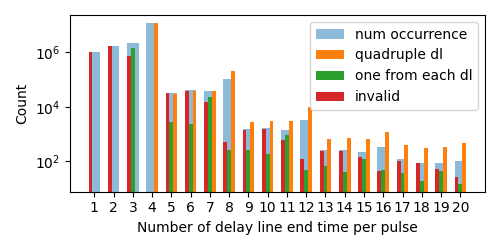

In [158]:
# Sort the dictionary by keys (channel lengths)
# sorted_lengths = sorted(channel_lengths.items())
# Extract the sorted lengths and counts
# lengths_all, counts_all = zip(*sorted_lengths)
bins = np.arange(1, 500)
channel_lengths_arr = np.array(list(channel_lengths.values()))
channel_lengths_event_valid_arr = np.array(list(channel_lengths_event_valid.values()))
channel_lengths_tof_valid_arr = np.array(list(channel_lengths_tof_valid.values()))
channel_lengths_invalid_arr = np.array(list(channel_lengths_invalid.values()))

index = 20
channel_lengths_arr = channel_lengths_arr[:index]
channel_lengths_event_valid_arr = channel_lengths_event_valid_arr[:index]
channel_lengths_tof_valid_arr = channel_lengths_tof_valid_arr[:index]
channel_lengths_invalid_arr = channel_lengths_invalid_arr[:index]

# Define the width of the bars
width = 0.2
fig, ax = plt.subplots(figsize=(5,2.5))
# Plot bar charts for all arrays
plt.bar(bins[:index], channel_lengths_arr, width=width*3, label='num occurrence', alpha=0.5)
plt.bar(bins[:index] + width, channel_lengths_event_valid_arr, width=width, label='quadruple dl')
plt.bar(bins[:index], channel_lengths_tof_valid_arr, width=width, label='one from each dl')
plt.bar(bins[:index] - width, channel_lengths_invalid_arr, width=width, label='invalid')

ax.set_xlabel('Number of delay line end time per pulse', fontsize=10)
plt.xticks(bins[:index], [str(i) for i in range(1, index+1)])
ax.set_ylabel('Count', fontsize=10)
ax.set_yscale('log')
plt.legend(loc='upper right')
plt.tight_layout()
from matplotlib import rcParams
rcParams['svg.fonttype'] = 'none'
plt.savefig("raw_stat.svg", format="svg", dpi=600)
plt.savefig("raw_stat.png", format="png", dpi=600)
plt.show()


In [148]:
time_data_tmp = [ 9787, 11545, 11060, 10261, 21775, 23533, 23060, 22261]
index = 0
xx_dif = time_data_tmp[index*4 + 1] - time_data_tmp[index*4 + 0]
yy_dif = time_data_tmp[index*4 + 3] - time_data_tmp[index*4 + 2]
time = time_data_tmp[index*4 + 0] + time_data_tmp[index*4 + 1] + time_data_tmp[index*4 + 2] + time_data_tmp[index*4 + 3]
xx_dif = -0.5*xx_dif + 1225
yy_dif = -0.5*yy_dif + 1225
time_1 = time * TOFFACTOR
xx_dif_1 = (((xx_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
yy_dif_1 = (((yy_dif - XYBINSHIFT) * XYFACTOR) * 0.1)

index = 1
xx_dif = time_data_tmp[index*4 + 1] - time_data_tmp[index*4 + 0]
yy_dif = time_data_tmp[index*4 + 3] - time_data_tmp[index*4 + 2]
time = time_data_tmp[index*4 + 0] + time_data_tmp[index*4 + 1] + time_data_tmp[index*4 + 2] + time_data_tmp[index*4 + 3]
xx_dif = -0.5*xx_dif + 1225
yy_dif = -0.5*yy_dif + 1225
time_2 = time * TOFFACTOR
xx_dif_2 = (((xx_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
yy_dif_2 = (((yy_dif - XYBINSHIFT) * XYFACTOR) * 0.1)

print(xx_dif_1, yy_dif_1)
print(xx_dif_2, yy_dif_2)
print(time_1, time_2)
print(abs(xx_dif_1 - xx_dif_2))
print(abs(yy_dif_1 - yy_dif_2))

-2.8702040816326537 1.3044897959183677
-2.8702040816326537 1.3044897959183677
292.514274 621.533682
0.0
0.0


In [163]:
min_x = []
min_y = []
for i, x in enumerate(result_total):
    length = len(x['channels'])
    if length == 8:
        time_data_tmp = np.array(x['time_data'], dtype=np.int64)
        # First event
        index = 0
        xx_dif = time_data_tmp[index*4 + 1] - time_data_tmp[index*4 + 0]
        yy_dif = time_data_tmp[index*4 + 3] - time_data_tmp[index*4 + 2]
        time = time_data_tmp[index*4 + 0] + time_data_tmp[index*4 + 1] + time_data_tmp[index*4 + 2] + time_data_tmp[index*4 + 3]
        xx_dif = -0.5*xx_dif + 1225
        yy_dif = -0.5*yy_dif + 1225
        time_1 = time * TOFFACTOR
        xx_dif_1 = (((xx_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
        yy_dif_1 = (((yy_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
        # second event
        index = 1
        xx_dif = time_data_tmp[index*4 + 1] - time_data_tmp[index*4 + 0]
        yy_dif = time_data_tmp[index*4 + 3] - time_data_tmp[index*4 + 2]
        time = time_data_tmp[index*4 + 0] + time_data_tmp[index*4 + 1] + time_data_tmp[index*4 + 2] + time_data_tmp[index*4 + 3]
        xx_dif = -0.5*xx_dif + 1225
        yy_dif = -0.5*yy_dif + 1225
        time_2 = time * TOFFACTOR
        xx_dif_2 = (((xx_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
        yy_dif_2 = (((yy_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
        if abs(xx_dif_1) <= 4 and abs(yy_dif_1) <= 4 and abs(xx_dif_2) <= 4 and abs(yy_dif_2) <= 4:
            if abs(xx_dif_1 - xx_dif_2) == 0 and abs(yy_dif_1 - yy_dif_2) == 0:
                print('event 1', xx_dif_1, yy_dif_1, time_1)
                print('event 2', xx_dif_2, yy_dif_2, time_2)
                print('time', time_data_tmp)
                print('start_counter',x['start_counter'])
                print('index in the dataset', x['indices'])
                print('=========')
            
            min_x.append(abs(xx_dif_1 - xx_dif_2))
            min_y.append(abs(yy_dif_1 - yy_dif_2))

event 1 -2.8702040816326537 1.3044897959183677 292.514274
event 2 -2.8702040816326537 1.3044897959183677 621.533682
time [ 9787 11545 11060 10261 21775 23533 23060 22261]
start_counter [1052, 1052, 1052, 1052, 1052, 1052, 1052, 1052]
index in the dataset (6050084, 6050091)
event 1 0.3624489795918368 -1.309387755102041 580.0770719999999
event 2 0.3624489795918368 -1.309387755102041 627.068088
time [21256 21034 20746 21548 22969 22747 22459 23261]
start_counter [8203, 8203, 8203, 8203, 8203, 8203, 8203, 8203]
index in the dataset (16367611, 16367618)
event 1 -0.30530612244897964 0.7428571428571429 572.382396
event 2 -0.30530612244897964 0.7428571428571429 3797.8643879999995
time [ 20771  20958  21094  20639 138353 138540 138674 138219]
start_counter [18438, 18438, 18438, 18438, 18438, 18438, 18438, 18438]
index in the dataset (22417287, 22417294)
event 1 -2.0440816326530618 0.6302040816326532 563.014368
event 2 -2.0440816326530618 0.6302040816326532 2119.999824
time [19897 21149 20718 20

In [160]:
df_tdc.iloc[6050084:6050091+1]

,channel,start_counter,high_voltage (V),pulse,time_data
6050084,3,1052,5232.990234,1046.598022,10261
6050085,0,1052,5232.990234,1046.598022,9787
6050086,1,1052,5232.990234,1046.598022,11545
6050087,2,1052,5232.990234,1046.598022,11060
6050088,0,1052,5232.990234,1046.598022,21775
6050089,3,1052,5232.990234,1046.598022,22261
6050090,1,1052,5232.990234,1046.598022,23533
6050091,2,1052,5232.990234,1046.598022,23060


In [139]:
[ 9787 11545 11060 10261 21775 23533 23060 22261]
[21256 21034 20746 21548 22969 22747 22459 23261]
[ 20771  20958  21094  20639 138353 138540 138674 138219]
[19897 21149 20718 20332 76656 77908 77475 77089]
[167528 168870 167883 168520 171260 172602 171615 172252]

-3.81061224489796

In [137]:
arr = np.array(min_x)

# Sort the array
sorted_arr = np.sort(arr)

# Second minimum value
second_min = sorted_arr[536]

print("Second minimum value:", second_min)

Second minimum value: 0.0016326530612236212


In [133]:
count = 0
multi_hit = 0
for x in result_total:
    if x['valid_event'].count(True) > 25:
        print(x['valid_event'].count(True), x['start_counter'][0])
    if x['valid_event'].count(True) > 1:
        multi_hit += 1
    for evn in x['valid_event']:
        if evn == True:
            count += 1
            
print(multi_hit)
print(count)

41 8538
64 11775
62 776
35 7752
43 14699
41 17267
67 4937
73 8005
51 12784
105 16102
53 16105
61 3736
35 7345
26 1551
77 3484
49 7526
54 995
35 18079
111344
12207256


In [79]:
det_x_total = []
det_y_total = []
tof_total = []
start_counter_total = []
high_voltage_total = []
pulse_total = []
print('length of result_total:', len(result_total))

# indexx = 1000000
for ion in tqdm(result_total, desc="Processing", unit="iteration"):
#     indexx -= 1
#     if indexx == 0:
#         break
    time_data_tmp = np.array(ion['time_data'], dtype=np.int64)
#     if abs(indexx) <= 1000:
#         print(time_data_tmp)
    for index, event in enumerate(ion['valid_event']):
#         if abs(indexx) <= 1000:
#             print(index, ion['valid_event'], event)
        if event:
            xx_dif = time_data_tmp[index*4 + 1] - time_data_tmp[index*4 + 0]
            yy_dif = time_data_tmp[index*4 + 3] - time_data_tmp[index*4 + 2]
            time = time_data_tmp[index*4 + 0] + time_data_tmp[index*4 + 1] + time_data_tmp[index*4 + 2] + time_data_tmp[index*4 + 3]
            xx_dif = -0.5*xx_dif + 1225
            yy_dif = -0.5*yy_dif + 1225
            time = time * TOFFACTOR
            xx_dif = (((xx_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
            yy_dif = (((yy_dif - XYBINSHIFT) * XYFACTOR) * 0.1)
            if abs(xx_dif) <= 4 and abs(yy_dif) <= 4:
                det_x_total.append(xx_dif)
                det_y_total.append(yy_dif)
                tof_total.append(time)
                start_counter_total.append(np.array(ion['start_counter'], dtype=np.int64)[0])
                high_voltage_total.append(ion['high_voltage'])
                pulse_total.append(ion['pulse'])

print(len(det_x_total))

length of result_total: 16947143


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16947143/16947143 [02:13<00:00, 127116.48iteration/s]

12163594


12163149 12163192 44 3484
min dx: 0.0016326530612240653
min dy: 0.0032653061224490187


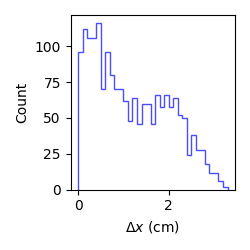

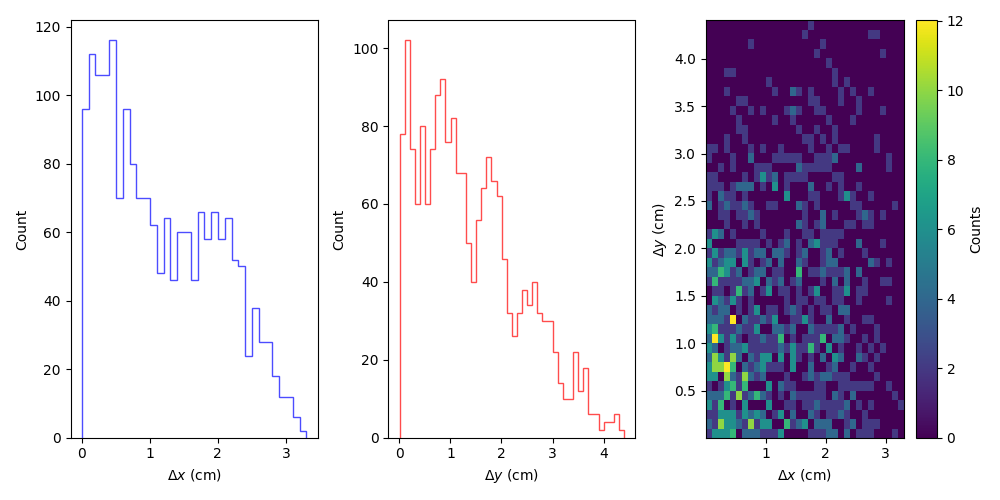

In [103]:
#dead zone

start_index, end_index, max_count, sc_num = raw_data_surface_concept.find_nth_max_repeated_indices(start_counter_total.copy(), 1)

print(start_index, end_index, max_count, sc_num)
det_x_sc = det_x_total[start_index:end_index+1]
det_y_sc = det_y_total[start_index:end_index+1]


dx = np.subtract.outer(det_x_sc, det_x_sc)
dy = np.subtract.outer(det_y_sc, det_y_sc)

dx = abs(dx)
dy = abs(dy)

dx = dx[dx!=0]
dy = dy[dy!=0]
print('min dx:', np.min(dx))
print('min dy:', np.min(dy))

# Plot histograms of dx and dy
fig1, ax1 = plt.subplots(figsize=(2.5,2.5))
bin_size = 0.1
edges_x = np.arange(np.min(dx), np.max(dx), bin_size)
plt.hist(dx.flatten(), bins=edges_x, color='blue', alpha=0.7, histtype='step')

plt.xlabel(r'$\Delta x$ (cm)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
from matplotlib import rcParams
rcParams['svg.fonttype'] = 'none'
plt.savefig("dead_zone_x.svg", format="svg", dpi=600)
plt.savefig("dead_zone_y.png", format="png", dpi=600)
plt.show()

# Plot histograms of dx and dy
plt.figure(figsize=(10, 5))
bin_size = 0.1
plt.subplot(1, 3, 1)
edges_x = np.arange(np.min(dx), np.max(dx), bin_size)
plt.hist(dx.flatten(), bins=edges_x, color='blue', alpha=0.7, histtype='step')

plt.xlabel(r'$\Delta x$ (cm)', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.subplot(1, 3, 2)
edges_y = np.arange(np.min(dy), np.max(dy), bin_size)
plt.hist(dy.flatten(), bins=edges_y, color='red', alpha=0.7, histtype='step')
plt.xlabel(r'$\Delta y$ (cm)', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.subplot(1, 3, 3)
hist2d, x_edges, y_edges = np.histogram2d(dx, dy, bins=[edges_x, edges_y])
extent = [x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]]
plt.imshow(hist2d.T, origin='lower', extent=extent, aspect="auto", cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel(r'$\Delta x$ (cm)', fontsize=10)
plt.ylabel(r'$\Delta y$ (cm)', fontsize=10)

plt.tight_layout()
plt.show()

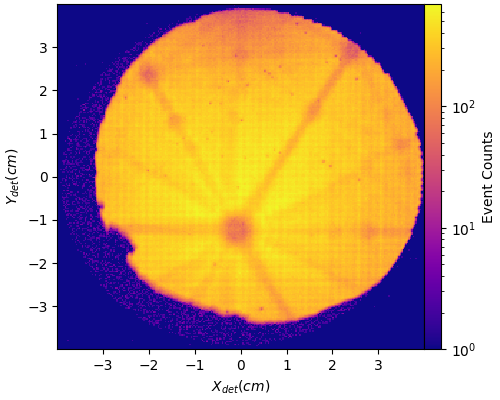

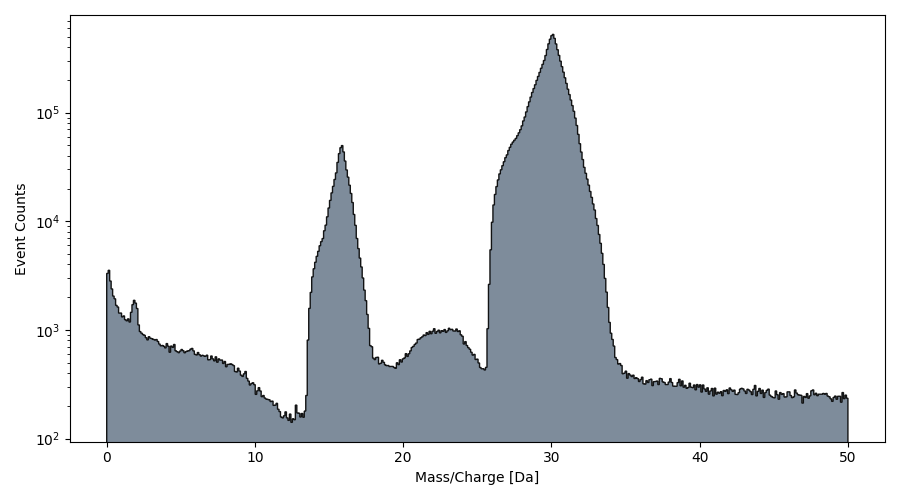

In [58]:
fdm = {'x_det (cm)': det_x_total, 'y_det (cm)': det_y_total}
fdm = pd.DataFrame(fdm)

plot_crop_fdm(fdm)
# mc = mc_tools.tof2mc(t=np.array(tof_total), t0=0, V=np.array(high_voltage_total), xDet=np.array(det_x_total), yDet=np.array(det_x_total), flightPathLength=110, V_pulse=np.array(pulse_total), mode='voltage')
mc = mc_tools.tof2mc(t=np.array(tof_total), t0=0, V=np.array(high_voltage_total), xDet=np.array(det_x_total), yDet=np.array(det_x_total), flightPathLength=110, V_pulse=np.zeros(len(det_x_total)), mode='voltage')
mc_plot = AptHistPlotter(mc[mc<50])
y_hist, x_hist = mc_plot.plot_histogram()

In [96]:
# Create a dictionary with the lists
data_total = {
        'high_voltage (V)': high_voltage_total,
        'pulse': pulse_total,
        'start_counter': start_counter_total,
        't (ns)': tof_total,
        'x_det (cm)': det_x_total,
        'y_det (cm)': det_y_total,
}

# Create a DataFrame
df_total = pd.DataFrame(data_total)
df_total.to_hdf('analyzed_raw_data.h5', key='df', mode='w')

In [98]:

# Create a dictionary with the lists
data_4 = {
        'high_voltage (V)': high_voltage_4,
        'pulse': pulse_4,
        'start_counter': start_counter_4,
        't (ns)': tof_4,
        'x_det (cm)': det_x_4,
        'y_det (cm)': det_y_4,
}

# Create a DataFrame
df_4 = pd.DataFrame(data_4)
df_4.to_hdf('analyzed_raw_data_4.h5', key='df', mode='w')